In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # plotting
import PdM_functions as pdm # custom functions created for this project that are used in several notebooks

In [2]:
selected_fp = 'data/Pump Sensors/sensor.csv'

In [3]:
df_raw = pd.read_csv(selected_fp, sep = ",")

In [4]:
df_raw['timestamp'].head(3)

0    2018-04-01 00:00:00
1    2018-04-01 00:01:00
2    2018-04-01 00:02:00
Name: timestamp, dtype: object

In [5]:
df_raw.describe()

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,220320.000000,210112.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,...,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,143303.000000,204937.000000
mean,110159.500000,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,...,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667
std,63601.049991,0.412227,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,...,10.259521,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598,65.258650,109.588607
min,0.000000,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,...,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,55079.750000,2.438831,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,...,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,167.534700,179.108800
50%,110159.500000,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,...,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,193.865700,197.338000
75%,165239.250000,2.499826,49.479160,52.777770,45.312500,637.615723,80.912150,14.539930,16.427950,15.697340,...,36.979164,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,219.907400,216.724500
max,220319.000000,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,...,374.218800,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000,1000.000000


In [6]:
# Convert timestamp to datetime datatype & sort
df_raw = df_raw.drop('Unnamed: 0', axis = 1)\
  .assign(timestamp = lambda x: pd.to_datetime(x['timestamp'], format = '%Y-%m-%d %H:%M:%S'))\
  .sort_values(by = 'timestamp')

In [7]:
df_raw.head(2) 

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.31076,634.375,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.6412,65.68287,50.92593,38.19444,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.31076,634.375,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.6412,65.68287,50.92593,38.19444,157.9861,67.70834,243.0556,201.3889,NORMAL


In [8]:
# Assign the timestamp as index for easier plotting
df_raw.index = df_raw['timestamp']

In [9]:
# Check on machine status values
print('Reported status types: ', df_raw['machine_status'].unique())

Reported status types:  ['NORMAL' 'BROKEN' 'RECOVERING']


In [10]:
# Check for NAs (missing data)
def check_for_nas(dat):
    for col in dat.columns:
        count_nas = dat[col].isnull().sum()
        count_per = str(round(100 * count_nas / len(dat), 2)) + '%'
        print('Column: ' + str(col) + ' has ' + str(count_nas) + ' NAs\t\t\t' + count_per)

In [11]:
# Check raw data
check_for_nas(df_raw)

Column: timestamp has 0 NAs			0.0%
Column: sensor_00 has 10208 NAs			4.63%
Column: sensor_01 has 369 NAs			0.17%
Column: sensor_02 has 19 NAs			0.01%
Column: sensor_03 has 19 NAs			0.01%
Column: sensor_04 has 19 NAs			0.01%
Column: sensor_05 has 19 NAs			0.01%
Column: sensor_06 has 4798 NAs			2.18%
Column: sensor_07 has 5451 NAs			2.47%
Column: sensor_08 has 5107 NAs			2.32%
Column: sensor_09 has 4595 NAs			2.09%
Column: sensor_10 has 19 NAs			0.01%
Column: sensor_11 has 19 NAs			0.01%
Column: sensor_12 has 19 NAs			0.01%
Column: sensor_13 has 19 NAs			0.01%
Column: sensor_14 has 21 NAs			0.01%
Column: sensor_15 has 220320 NAs			100.0%
Column: sensor_16 has 31 NAs			0.01%
Column: sensor_17 has 46 NAs			0.02%
Column: sensor_18 has 46 NAs			0.02%
Column: sensor_19 has 16 NAs			0.01%
Column: sensor_20 has 16 NAs			0.01%
Column: sensor_21 has 16 NAs			0.01%
Column: sensor_22 has 41 NAs			0.02%
Column: sensor_23 has 16 NAs			0.01%
Column: sensor_24 has 16 NAs			0.01%
Column: sensor_25 has 3

sensor_15, 50 and 51 contain a large number of NAs, let's drop for initial assessment.

In [12]:
df_set = df_raw.drop(['sensor_15', 'sensor_50', 'sensor_51'], axis = 1)

# Replace NAs in remaining data by using lasf value fill forward method
df_set = df_set.fillna(method = 'ffill')

In [13]:
# Check for NAs again
check_for_nas(df_set)

Column: timestamp has 0 NAs			0.0%
Column: sensor_00 has 0 NAs			0.0%
Column: sensor_01 has 0 NAs			0.0%
Column: sensor_02 has 0 NAs			0.0%
Column: sensor_03 has 0 NAs			0.0%
Column: sensor_04 has 0 NAs			0.0%
Column: sensor_05 has 0 NAs			0.0%
Column: sensor_06 has 0 NAs			0.0%
Column: sensor_07 has 0 NAs			0.0%
Column: sensor_08 has 0 NAs			0.0%
Column: sensor_09 has 0 NAs			0.0%
Column: sensor_10 has 0 NAs			0.0%
Column: sensor_11 has 0 NAs			0.0%
Column: sensor_12 has 0 NAs			0.0%
Column: sensor_13 has 0 NAs			0.0%
Column: sensor_14 has 0 NAs			0.0%
Column: sensor_16 has 0 NAs			0.0%
Column: sensor_17 has 0 NAs			0.0%
Column: sensor_18 has 0 NAs			0.0%
Column: sensor_19 has 0 NAs			0.0%
Column: sensor_20 has 0 NAs			0.0%
Column: sensor_21 has 0 NAs			0.0%
Column: sensor_22 has 0 NAs			0.0%
Column: sensor_23 has 0 NAs			0.0%
Column: sensor_24 has 0 NAs			0.0%
Column: sensor_25 has 0 NAs			0.0%
Column: sensor_26 has 0 NAs			0.0%
Column: sensor_27 has 0 NAs			0.0%
Column: sensor_28 ha

/Users/jasonpayne/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


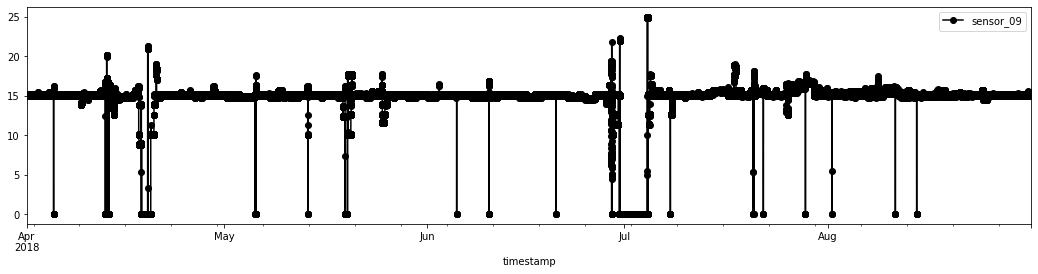

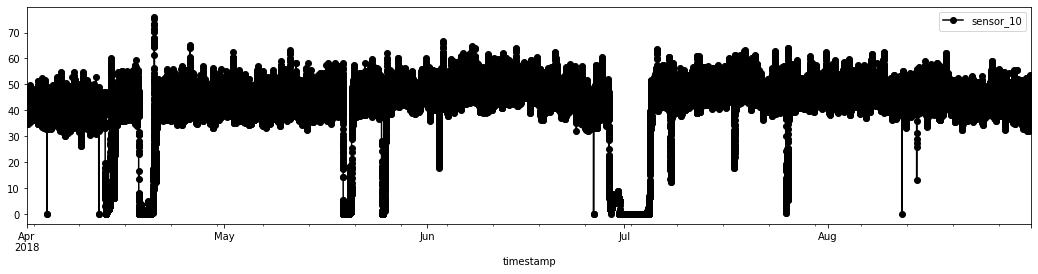

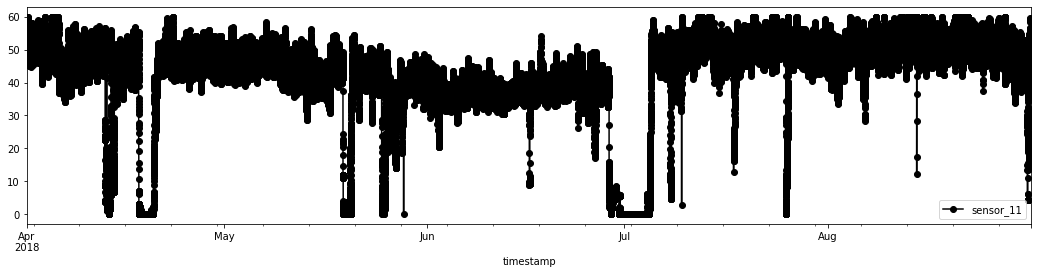

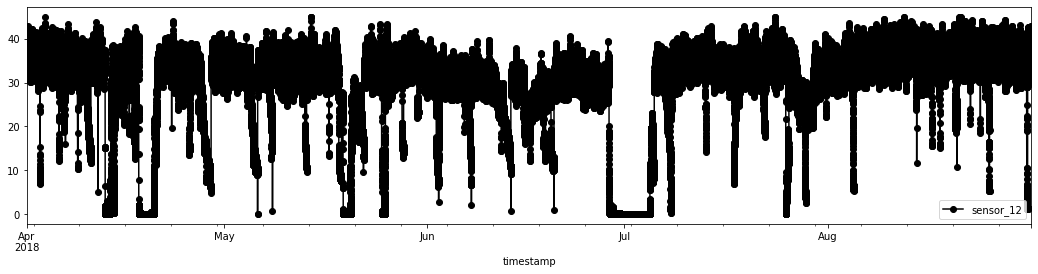

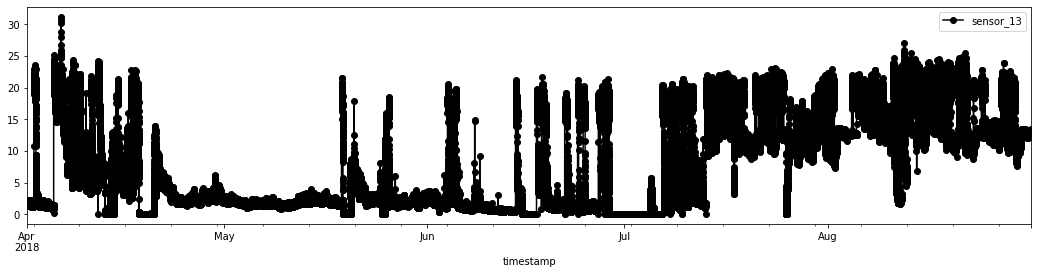

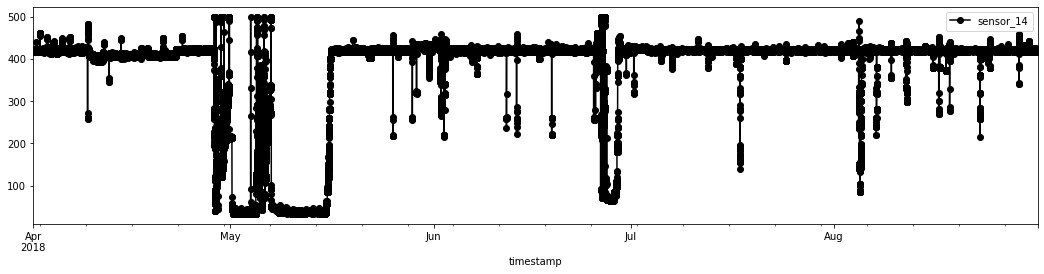

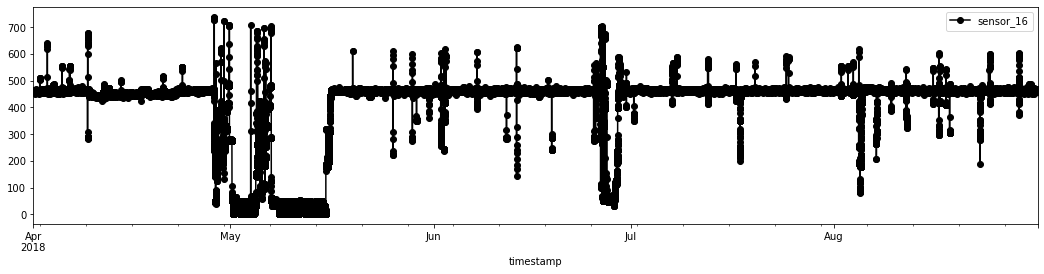

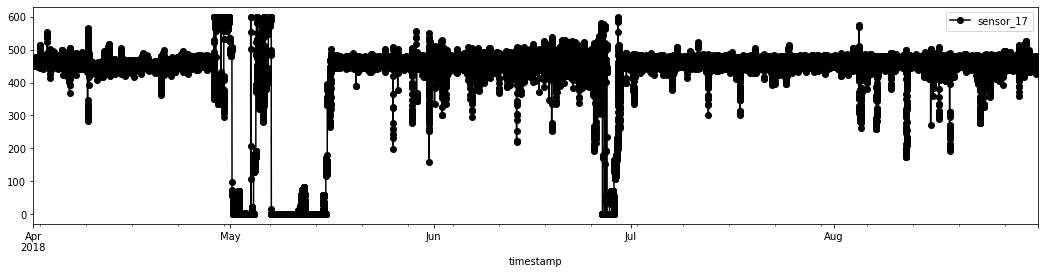

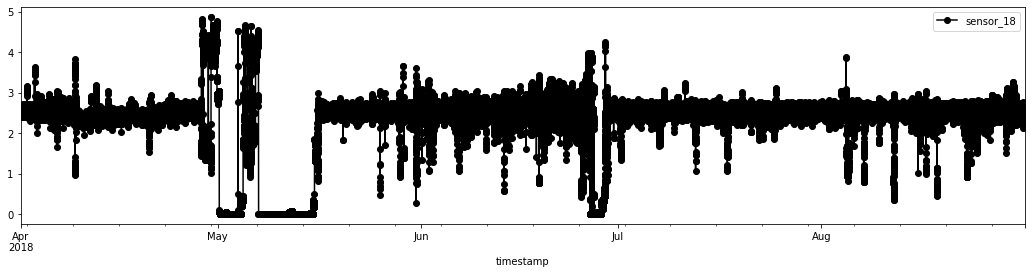

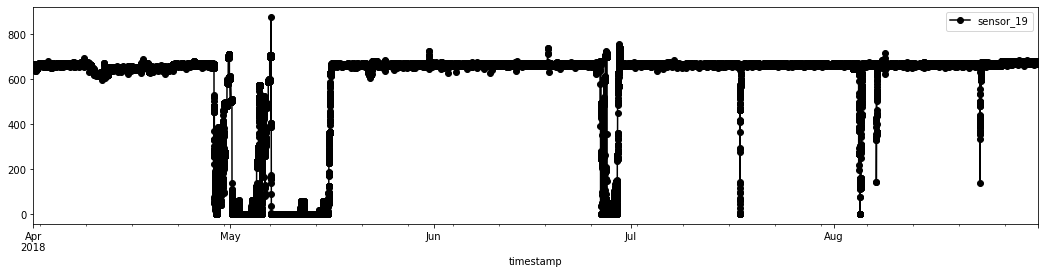

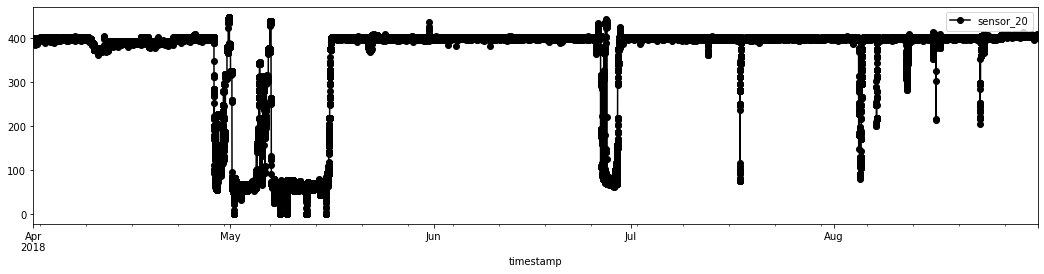

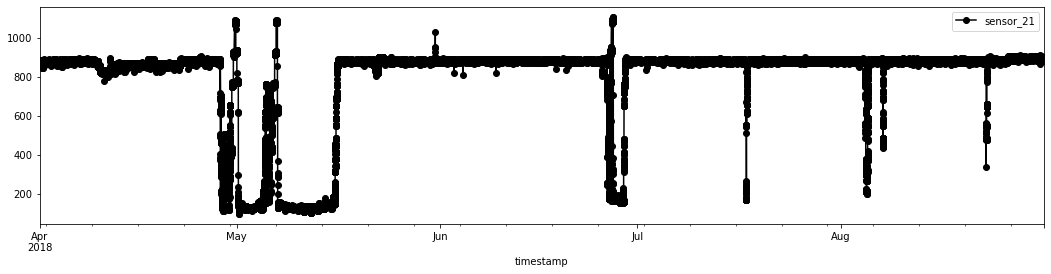

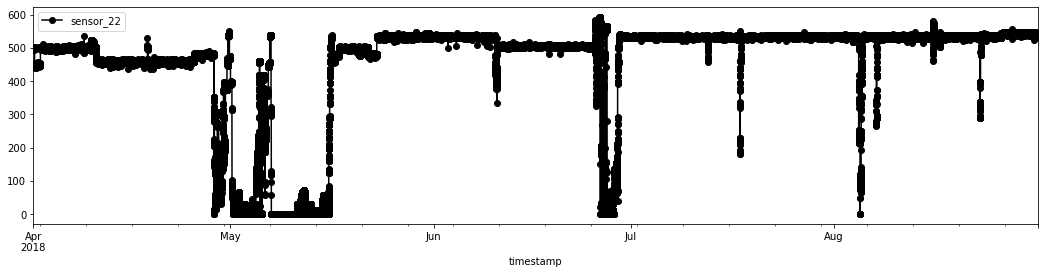

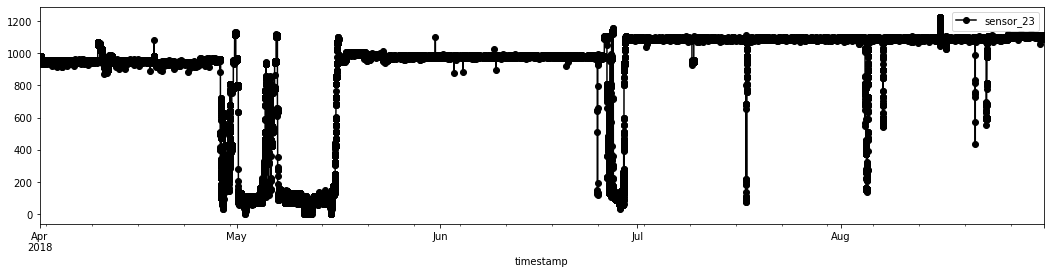

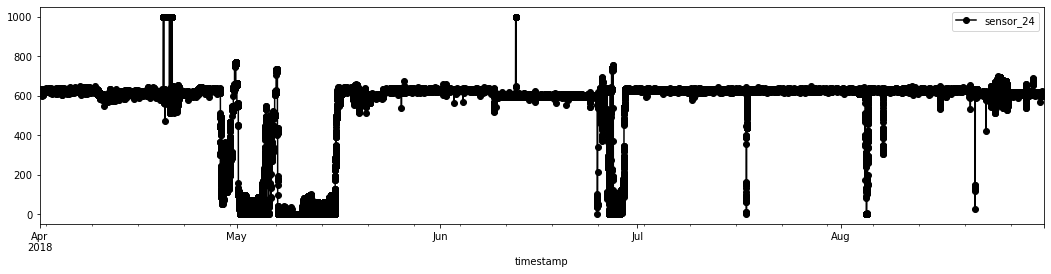

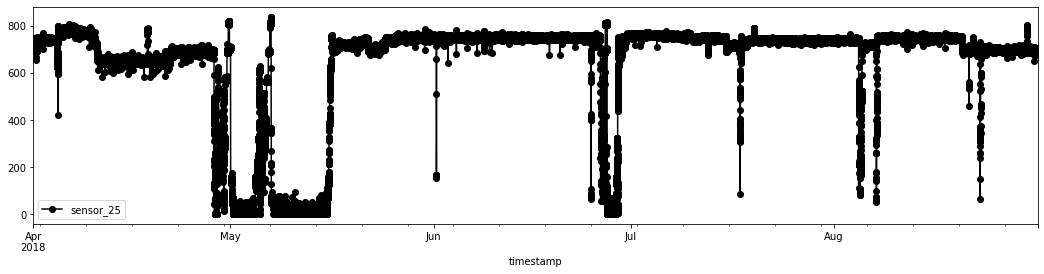

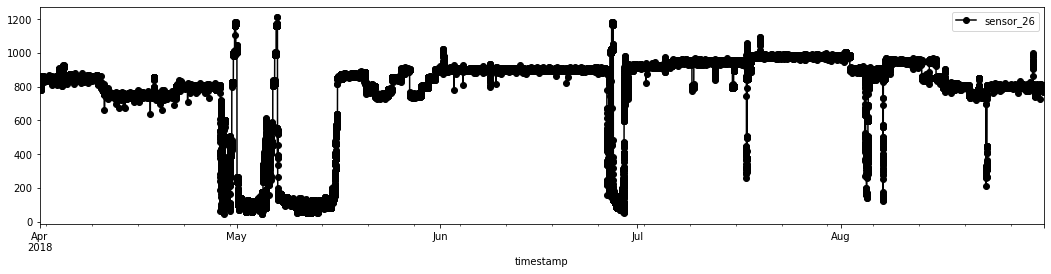

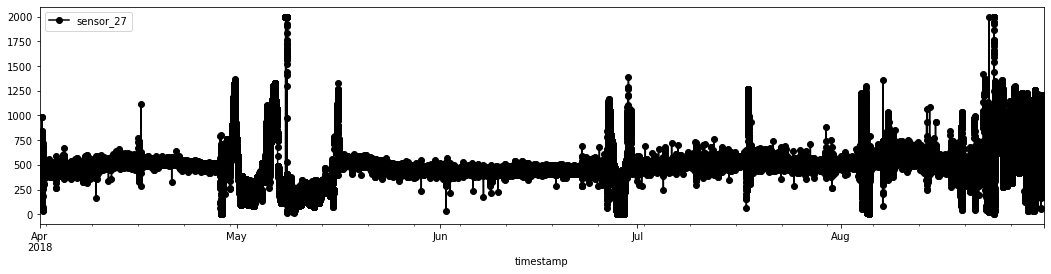

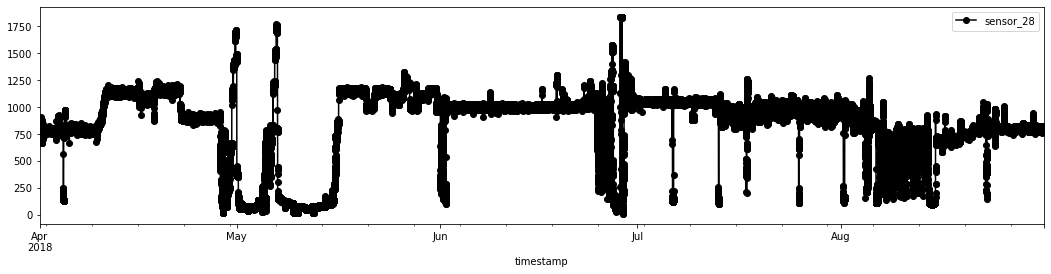

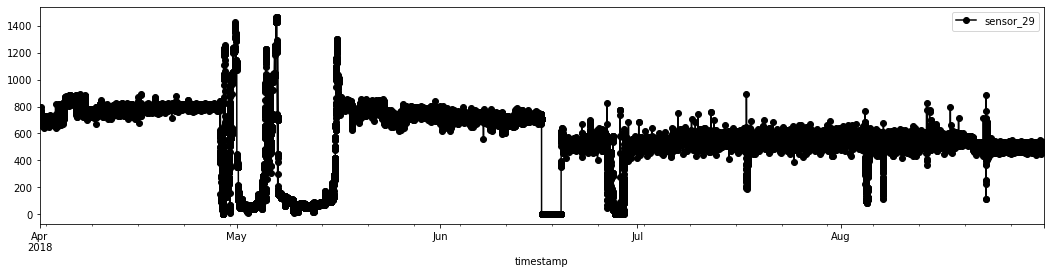

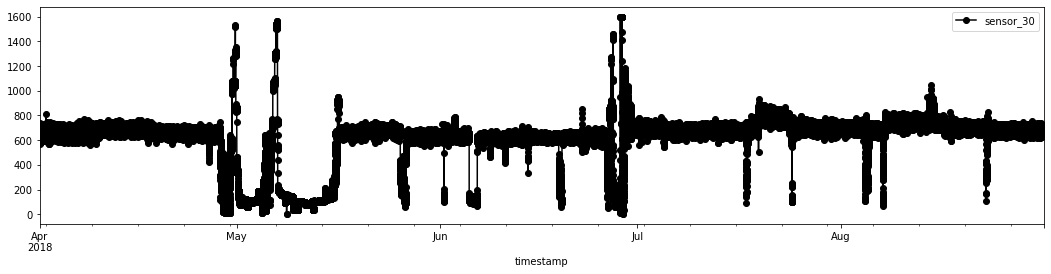

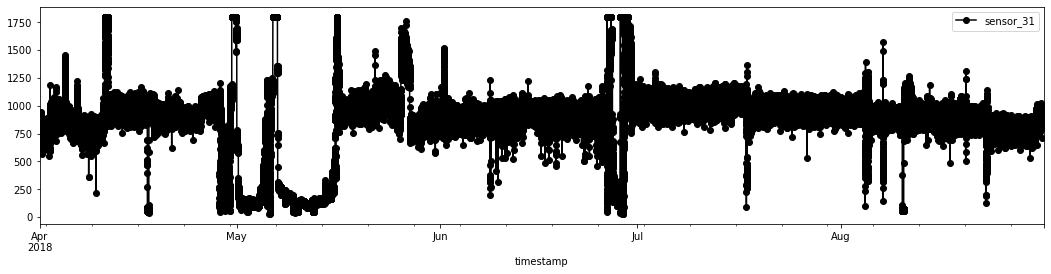

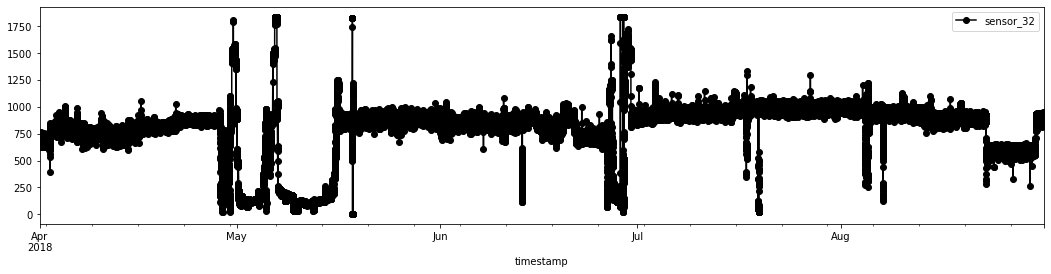

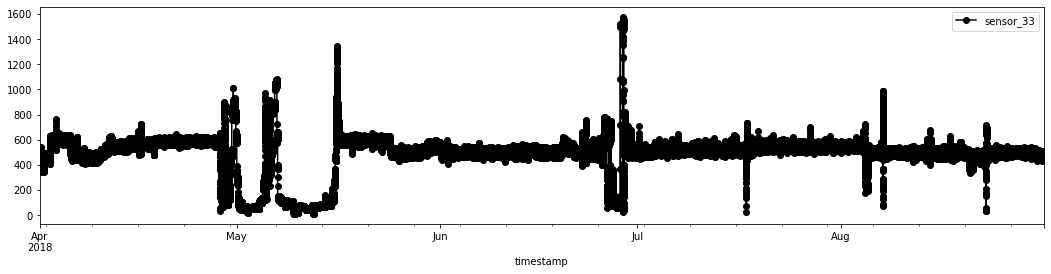

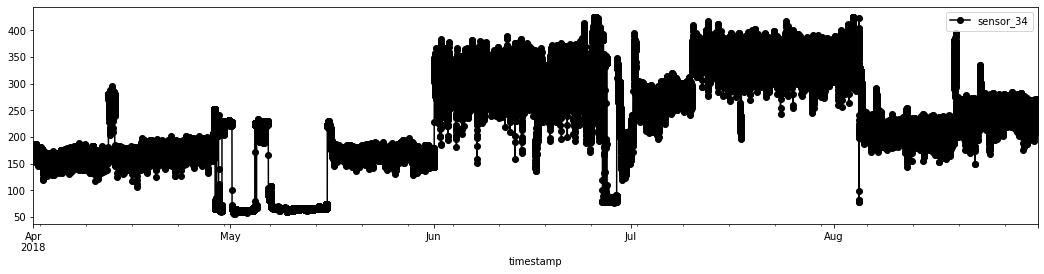

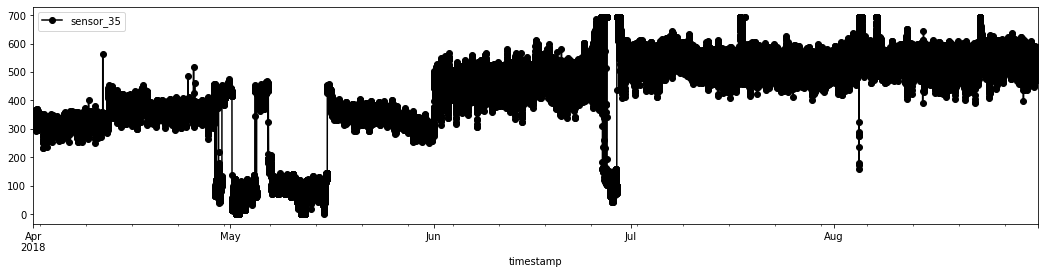

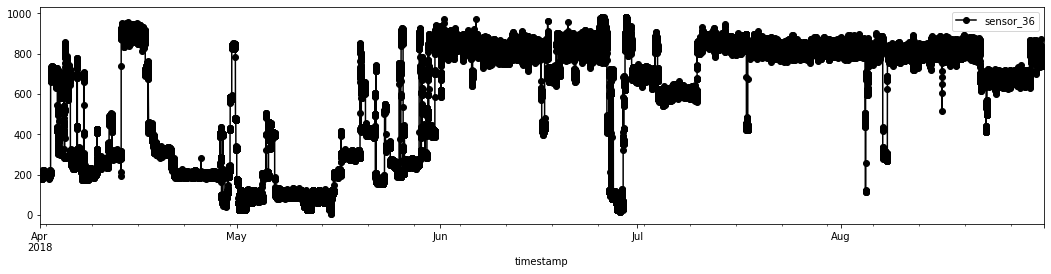

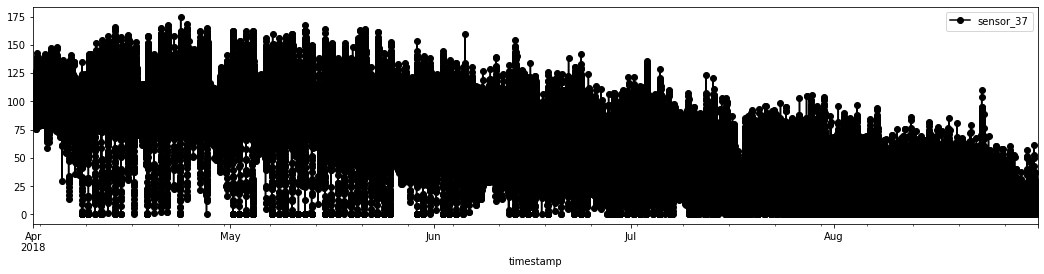

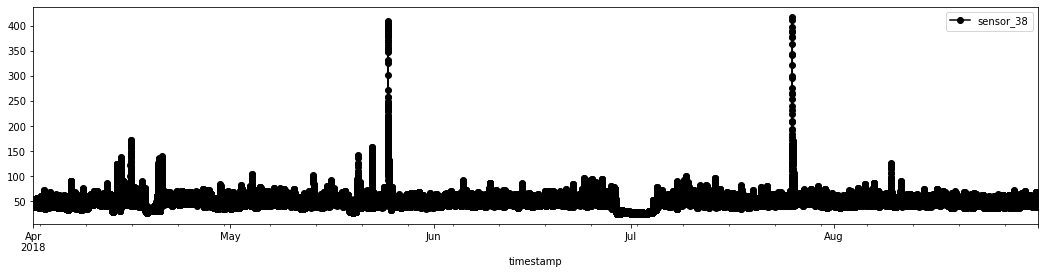

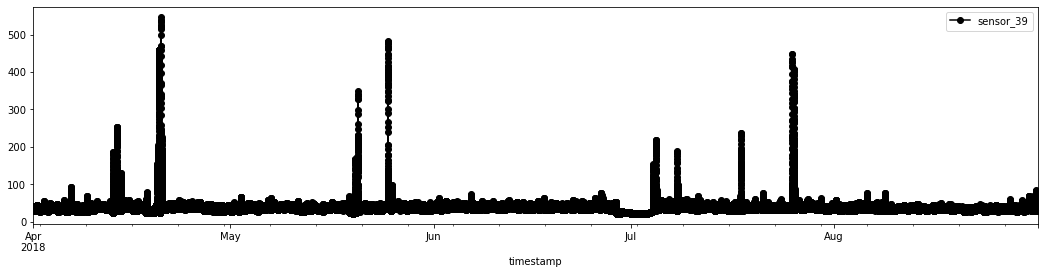

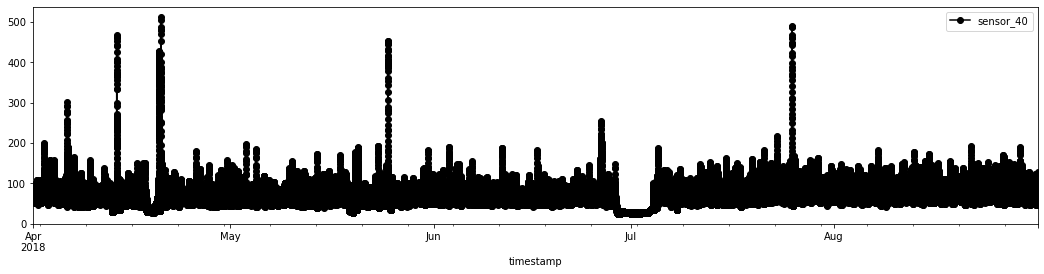

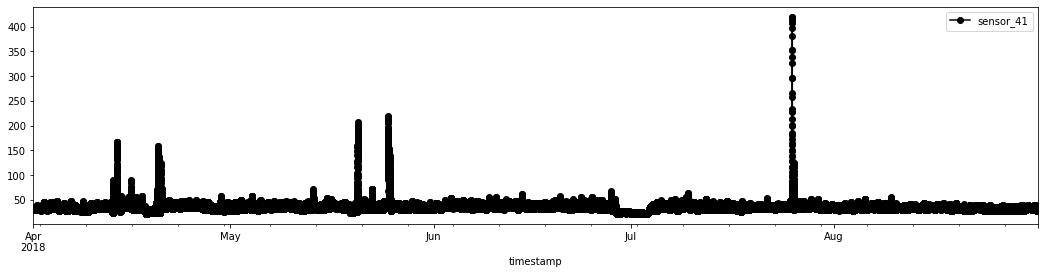

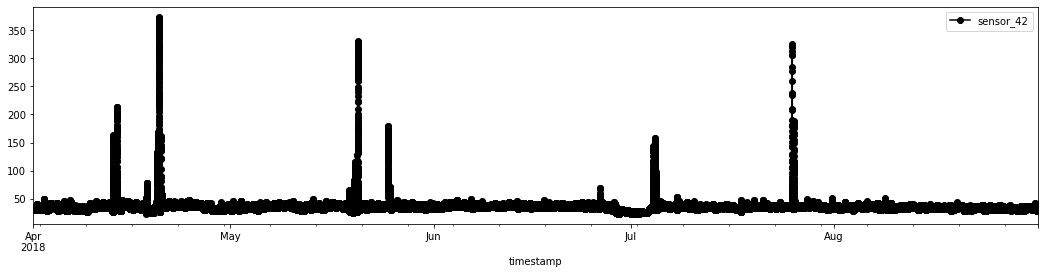

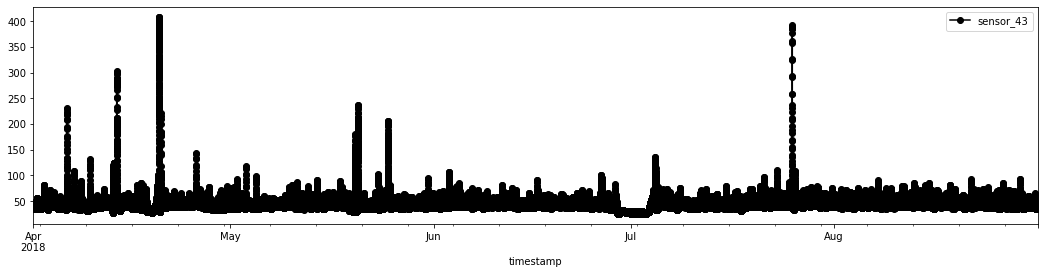

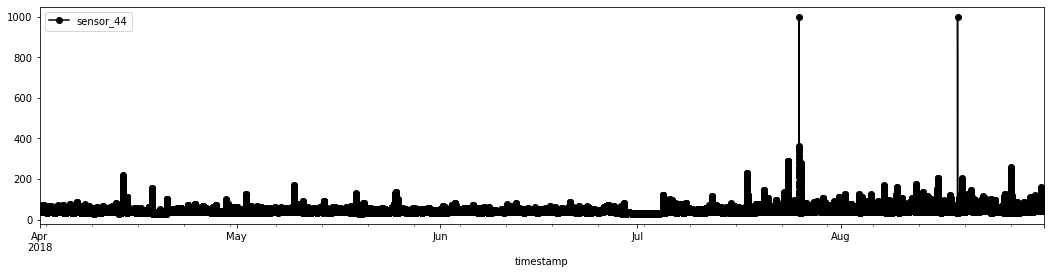

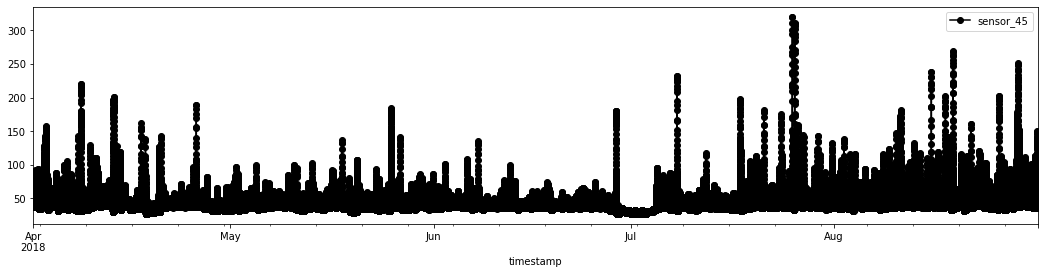

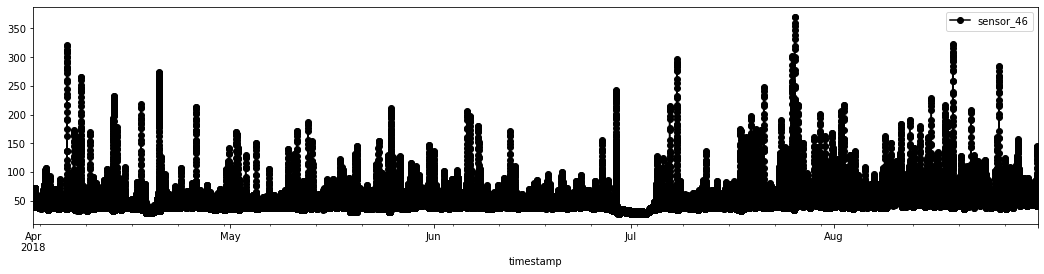

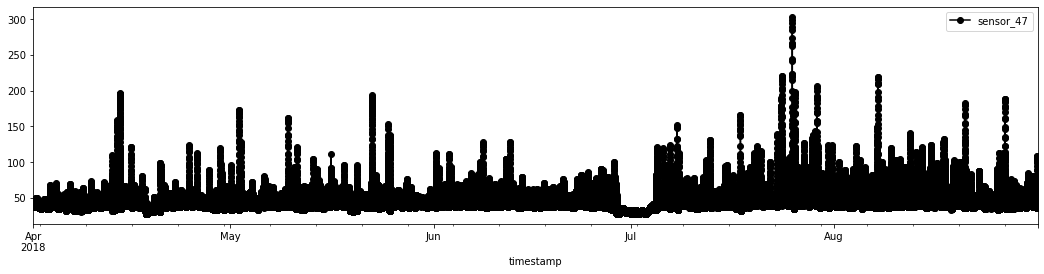

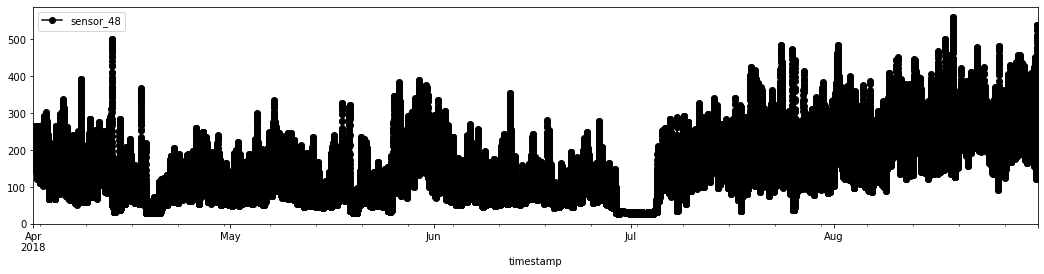

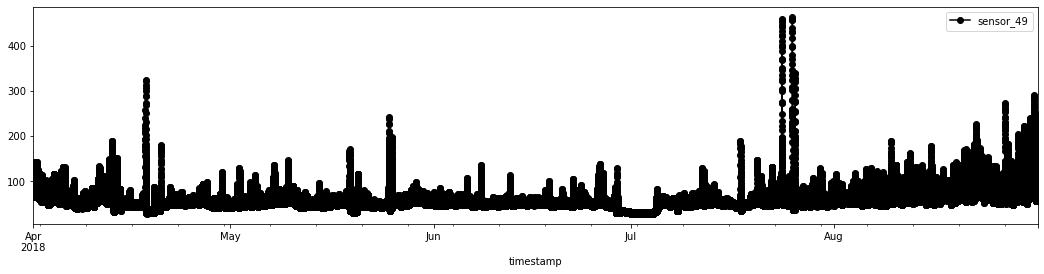

In [20]:
# Plot the data
for chan in df_set.columns[10:-1]:
    df_set[[chan]].plot(figsize = (18, 4), color = 'black', marker = 'o')

In [23]:
# Apply some cleaning to df_set
s1_med = df_set['sensor_01'].median()
df_set['sensor_01'] = df_set['sensor_01']\
  .apply(lambda x: s1_med if x in ['nan'] else pdm.clampit(x, cl_lim = 28, cl_val = s1_med, cl_type = 'low'))

s9_med = df_set['sensor_09'].median()
df_set['sensor_09'] = df_set['sensor_09']\
  .apply(lambda x: s1_med if x in ['nan'] else pdm.clampit(x, cl_lim = 6, cl_val = s9_med, cl_type = 'low'))

<AxesSubplot:xlabel='timestamp'>

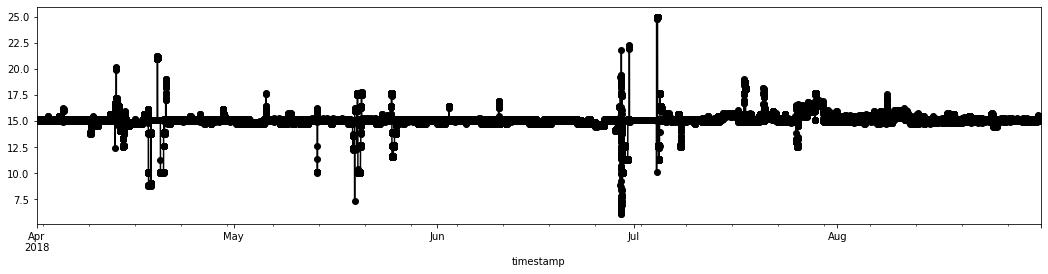

In [24]:
 df_set['sensor_09'].plot(figsize = (18, 4), color = 'black', marker = 'o')

In [51]:
df_set.columns

Index(['timestamp', 'sensor_00', 'sensor_01', 'sensor_02', 'sensor_03',
       'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08',
       'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13',
       'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24',
       'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29',
       'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34',
       'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39',
       'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44',
       'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49',
       'machine_status'],
      dtype='object')

In [52]:
include_cols = [
    'timestamp', 
    'sensor_00',
    'sensor_01',
    'sensor_02',
    'sensor_03',
    'sensor_04',
    'sensor_05',
    'sensor_06',
    'machine_status'
]

In [53]:
# Subset data tagged as 'Normal' operating 
df_norm = df_set.loc[df_set['machine_status'] == 'NORMAL', include_cols]  
df_norm['timestamp'] = pd.to_datetime(df_norm.index, format = '%Y-%m-%d %H:%M:%S')

In [70]:
# Subset data tagged as 'Normal' operating 
df_reco = df_set.loc[df_set['machine_status'] == 'RECOVERING', include_cols] 
df_reco['timestamp'] = pd.to_datetime(df_reco.index, format = '%Y-%m-%d %H:%M:%S')

In [71]:
# Subset data tagged as 'Normal' operating 
df_brok = df_set.loc[df_set['machine_status'] == 'BROKEN', include_cols] 
df_brok['timestamp'] = pd.to_datetime(df_brok.index, format = '%Y-%m-%d %H:%M:%S')

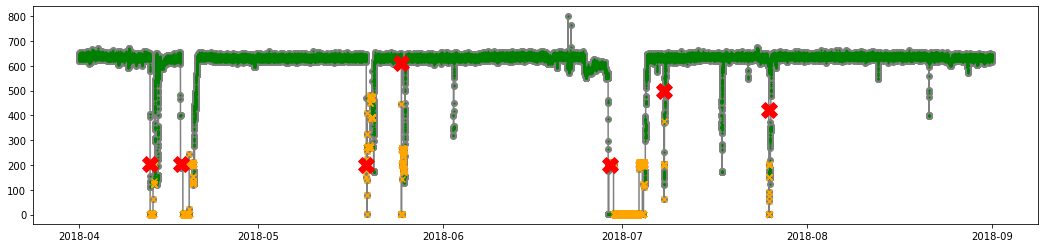

In [72]:
# Visualize machine status over time for the data using sensor04 as reference
fig, ax = plt.subplots(figsize = (18, 4))
ax.plot(df_set['timestamp'], df_set['sensor_04'], color = 'grey', marker = 'o', zorder = 1)
ax.scatter(df_norm['timestamp'], df_norm['sensor_04'], color ='green', marker = 'o', zorder = 2, s = 1)
ax.scatter(df_reco['timestamp'], df_reco['sensor_04'], color ='orange', marker = 'x', zorder = 3)
ax.scatter(df_brok['timestamp'], df_brok['sensor_04'], color ='red', marker = 'X', zorder = 3, s = 250)
plt.show()

Time series shows 7x recorded failures with recovery periods.  

In [73]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from matplotlib import gridspec
from matplotlib.pyplot import figure

In [74]:
# Prepare data for PCA
df_pca = df_norm.drop(['machine_status', 'timestamp'], axis = 1)
df_test = df_brok.drop(['machine_status', 'timestamp'], axis = 1)

In [75]:
scaler = preprocessing.MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_pca), columns = df_pca.columns, index = df_pca.index)
df_scaled_test = pd.DataFrame(scaler.fit_transform(df_test), columns = df_test.columns, index = df_test.index)
df_scaled.describe()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06
count,205836.000000,205836.000000,205836.000000,205836.000000,205836.000000,205836.000000,205836.000000
mean,0.949574,0.585771,0.763904,0.728511,0.781327,0.753899,0.868347
std,0.095121,0.108495,0.100874,0.111733,0.063749,0.093814,0.054226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.959089,0.513684,0.710956,0.659884,0.784547,0.705016,0.838095
50%,0.963721,0.589474,0.769231,0.741279,0.790935,0.756479,0.856689
75%,0.980702,0.652632,0.832168,0.808139,0.796743,0.806026,0.912472
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
df_train = df_scaled
df_test = df_scaled_test 

In [77]:
# Define the PCA model (all compoments)
n_comps = 2 # How many dimensions you want to reduce to
pca = PCA(n_components = n_comps, svd_solver = 'full')

# Compute PCA components for the training set
X_train_PCA = pca.fit_transform(df_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = df_train.index

# Project the test data onto the PCA space
X_test_PCA = pca.transform(df_scaled_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = df_test.index

# Print the explained variance
# 3 decimal places and don't use scientific notation
np.set_printoptions(precision = 3, suppress=True) 
print('Explained variance:', pca.explained_variance_ratio_)

Explained variance: [0.424 0.225]


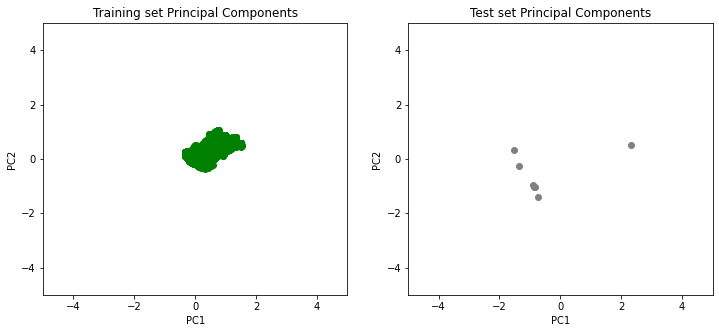

In [62]:
# Plot PC1 vs PC2 for training & test sets
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
gs = gridspec.GridSpec(1, 2, width_ratios = [1, 1])

ax0 = plt.subplot(gs[0])
ax0.scatter(X_train_PCA.loc[:, 0], X_train_PCA.loc[:, 1], color = 'green')
ax0.set_xlabel('PC1')
ax0.set_ylabel('PC2')
ax0.set_xlim(-5, 5)
ax0.set_ylim(-5, 5)
ax0.set_title('Training set Principal Components')

ax1 = plt.subplot(gs[1])
ax1.scatter(X_test_PCA.loc[:, 0], X_test_PCA.loc[:, 1], color = 'grey')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_xlim(-5, 5)
ax1.set_ylim(-5, 5)
ax1.set_title('Test set Principal Components')

plt.show()

In [78]:
# Move on to calculate Mahalanobis Distance 
# This is a multivatiate distance from centroid calculation that
# can be useful for unsupervised anomaly detection
data_train = np.array(X_train_PCA.values)
data_test = np.array(X_test_PCA.values)

cov_matrix = np.cov(data_train, rowvar = False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Mean of each column: PC1, PC2 (it should be very close to zero)
mean_distr = data_train.mean(axis = 0) # axis=0 means that average is computed per column
np.set_printoptions(precision = 3, suppress = False)
print('Mean distr', mean_distr)

# Mahalanobis Distance calculation
dist_test = pdm.MahalanobisDist(inv_cov_matrix, mean_distr, data_test, verbose=False)
dist_train = pdm.MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)

print("Minimum & maximum MD in training set:", min(dist_train), max(dist_train))
print("Minimum & maximum MD in test set    :", min(dist_test), max(dist_test))

threshold = pdm.MD_threshold(dist_train, extreme = True) # extreme = True; 2x mean of incoming data
print("Threshold value for flagging an anomaly is", "{:.2f}".format(threshold))

Mean distr [ 1.215e-17 -2.393e-16]
Minimum & maximum MD in training set: 0.0018457986132366818 10.898153621113575
Minimum & maximum MD in test set    : 1.3058174580251876 11.278169606038592
Threshold value for flagging an anomaly is 2.98


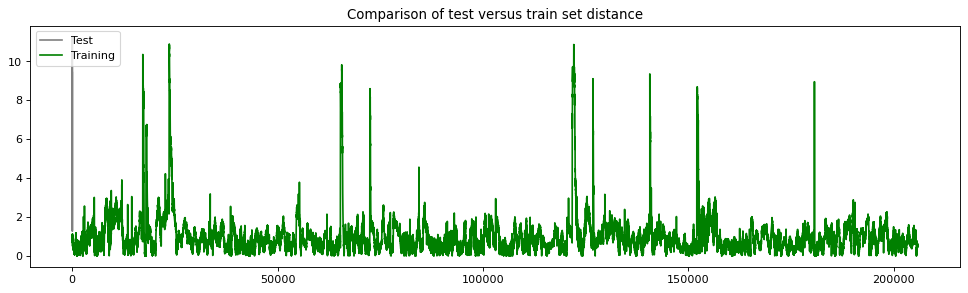

In [79]:
figure(figsize = (15, 4), dpi = 80)
plt.plot(np.array(dist_test), label = "Test", color = 'grey')
plt.plot(np.array(dist_train) , label = "Training", color = 'green')
plt.legend(loc = "upper left")
plt.title("Comparison of test versus train set distance")
plt.show()

/Users/jasonpayne/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


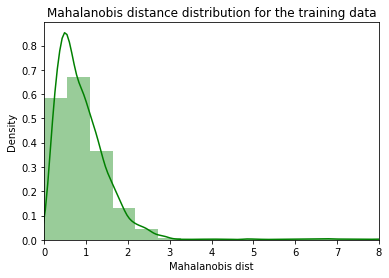

In [80]:
import seaborn as sns
plt.figure()
sns.distplot(dist_train,
             bins = 20, 
             kde= True, 
            color = 'green');
plt.xlim([0.0, 8])
plt.xlabel('Mahalanobis dist')
plt.title('Mahalanobis distance distribution for the training data')
plt.show()

In [81]:
# Prepare training data for visualization
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist']= dist_train
anomaly_train['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index
anomaly_train['timestamp'] = anomaly_train.index

n_outliers_train = anomaly_train[ anomaly_train['Anomaly'] == True].shape[0]
print("There are", n_outliers_train, "anomalies in the train set out of", anomaly_train.shape[0], "points")
print("Corresponding to " + str(round(100*(n_outliers_train / anomaly_train.shape[0]), 2)) + '%')

# Prepare test data for visualization
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index
anomaly['timestamp'] = anomaly.index

n_outliers = anomaly[anomaly['Anomaly'] == True].shape[0]
print("There are", n_outliers, "anomalies in the test set out of", anomaly.shape[0], "points")
print("Corresponding to " + str(round(100*(n_outliers / anomaly.shape[0]), 2)) + '%')

There are 3960 anomalies in the train set out of 205836 points
Corresponding to 1.92%
There are 4 anomalies in the test set out of 7 points
Corresponding to 57.14%


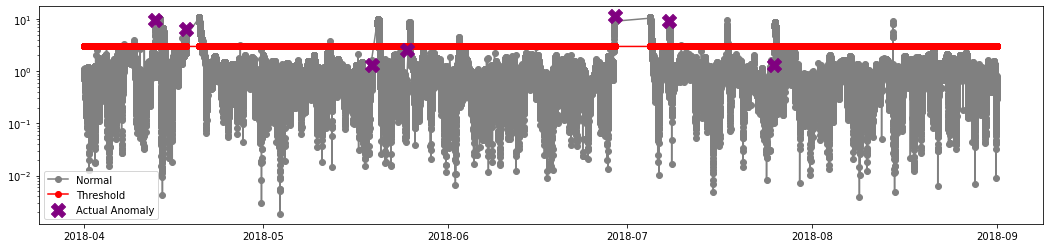

In [82]:
# Visualize Mahalonobis distance with actual anomalies vs threshold  
fig, ax = plt.subplots(figsize = (18, 4))
ax.plot(anomaly_train['timestamp'], anomaly_train['Mob dist'], color = 'grey', marker = 'o', zorder = 1, label = 'Normal')
ax.plot(anomaly_train['timestamp'], anomaly_train['Thresh'], color = 'red', marker = 'o', zorder = 2, label = 'Threshold')
ax.scatter(anomaly['timestamp'], anomaly['Mob dist'], color = 'purple', marker = 'X', zorder = 3, s = 200, label = 'Actual Anomaly')
ax.set_yscale('log')
ax.legend(loc = 'lower left')
plt.show()

### Robust PCA

In [83]:
# Compute all PCA components for the training set
L_train, S = pdm.R_pca(df_train).fit()
X_train_PCA = pca.fit_transform(L_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = df_train.index

# Project the test data onto the PCA space
L_test, S = pdm.R_pca(df_test).fit()
X_test_PCA = pca.transform(L_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = df_test.index

iteration: 1, error: 0.9809958919764761
iteration: 100, error: 0.008719286949208573
iteration: 200, error: 0.0064227534284520445
iteration: 300, error: 0.003092893549067035
iteration: 400, error: 0.00224458997489879
iteration: 500, error: 0.0018405255148491414
iteration: 600, error: 0.0012453575653542297
iteration: 700, error: 0.000970868384525439
iteration: 800, error: 0.0007357636770265995
iteration: 900, error: 0.0005266664813005648
iteration: 1000, error: 0.0004348768397633747
iteration: 1, error: 0.7353240090662475
iteration: 100, error: 5.882755225945345e-06
iteration: 120, error: 4.47377933333069e-07


In [84]:
# 3 decimal places and don't use scientific notation
np.set_printoptions(precision = 3, suppress = True) 
print('Explained variance:', pca.explained_variance_ratio_)

Explained variance: [0.929 0.068]


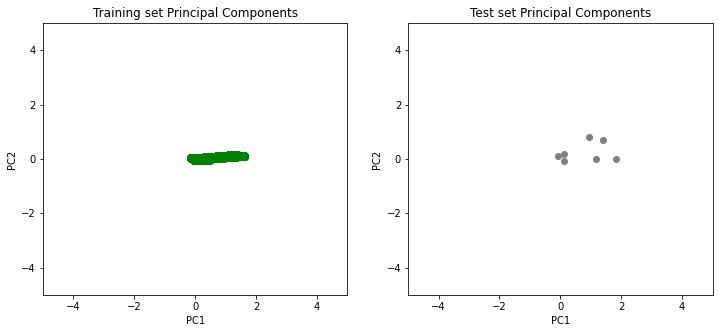

In [85]:
# Plot PC1 vs PC2 for training & test sets
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
gs = gridspec.GridSpec(1, 2, width_ratios = [1, 1])

ax0 = plt.subplot(gs[0])
ax0.scatter(X_train_PCA.loc[:, 0], X_train_PCA.loc[:, 1], color = 'green')
ax0.set_xlabel('PC1')
ax0.set_ylabel('PC2')
ax0.set_xlim(-5, 5)
ax0.set_ylim(-5, 5)
ax0.set_title('Training set Principal Components')

ax1 = plt.subplot(gs[1])
ax1.scatter(X_test_PCA.loc[:, 0], X_test_PCA.loc[:, 1], color = 'grey')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_xlim(-5, 5)
ax1.set_ylim(-5, 5)
ax1.set_title('Test set Principal Components')

plt.show()

In [86]:
# Move on to calculate Mahalanobis Distance 
# This is a multivatiate distance from centroid calculation that
# can be useful for unsupervised anomaly detection
data_train = np.array(X_train_PCA.values)
data_test = np.array(X_test_PCA.values)

cov_matrix = np.cov(data_train, rowvar = False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Mean of each column: PC1, PC2 (it should be very close to zero)
mean_distr = data_train.mean(axis = 0) # axis=0 means that average is computed per column
np.set_printoptions(precision = 3, suppress = False)
print('Mean distr', mean_distr)

# Mahalanobis Distance calculation
dist_test = pdm.MahalanobisDist(inv_cov_matrix, mean_distr, data_test, verbose=False)
dist_train = pdm.MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)

print("Minimum & maximum MD in training set:", min(dist_train), max(dist_train))
print("Minimum & maximum MD in test set    :", min(dist_test), max(dist_test))

threshold = pdm.MD_threshold(dist_train, extreme = True) # extreme = True; 2x mean of incoming data
print("Threshold value for flagging an anomaly is", "{:.2f}".format(threshold))

Mean distr [ 3.734e-14 -2.000e-14]
Minimum & maximum MD in training set: 0.008063426748667186 11.070991863706386
Minimum & maximum MD in test set    : 2.1850213160808996 20.199896906227423
Threshold value for flagging an anomaly is 3.05


/Users/jasonpayne/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


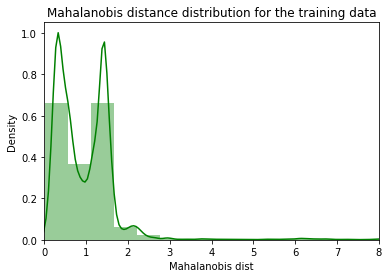

In [87]:
import seaborn as sns
plt.figure()
sns.distplot(dist_train,
             bins = 20, 
             kde= True, 
            color = 'green');
plt.xlim([0.0, 8])
plt.xlabel('Mahalanobis dist')
plt.title('Mahalanobis distance distribution for the training data')
plt.show()

In [88]:
# Prepare training data for visualization
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist']= dist_train
anomaly_train['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index
anomaly_train['timestamp'] = anomaly_train.index

n_outliers_train = anomaly_train[ anomaly_train['Anomaly'] == True].shape[0]
print("There are", n_outliers_train, "anomalies in the train set out of", anomaly_train.shape[0], "points")
print("Corresponding to " + str(round(100*(n_outliers_train / anomaly_train.shape[0]), 2)) + '%')

# Prepare test data for visualization
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index
anomaly['timestamp'] = anomaly.index

n_outliers = anomaly[anomaly['Anomaly'] == True].shape[0]
print("There are", n_outliers, "anomalies in the test set out of", anomaly.shape[0], "points")
print("Corresponding to " + str(round(100*(n_outliers / anomaly.shape[0]), 2)) + '%')

There are 3839 anomalies in the train set out of 205836 points
Corresponding to 1.87%
There are 5 anomalies in the test set out of 7 points
Corresponding to 71.43%


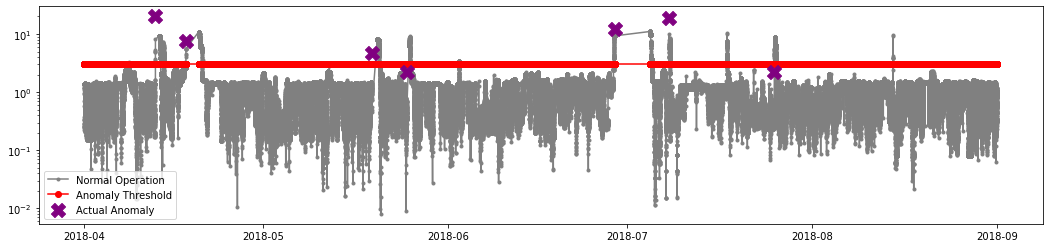

In [92]:
# Visualize Mahalonobis distance with actual anomalies vs threshold  
fig, ax = plt.subplots(figsize = (18, 4))
ax.plot(anomaly_train['timestamp'], anomaly_train['Mob dist'], color = 'grey', marker = '.', zorder = 1, label = 'Normal Operation')
ax.plot(anomaly_train['timestamp'], anomaly_train['Thresh'], color = 'red', marker = 'o', zorder = 2, label = 'Anomaly Threshold')
ax.scatter(anomaly['timestamp'], anomaly['Mob dist'], color = 'purple', marker = 'X', zorder = 3, s = 200, label = 'Actual Anomaly')
ax.set_yscale('log')
ax.legend(loc = 'lower left')
plt.show()